In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')


print("Customers Dataset Info:")
print(customers.info(), "\n")
print("Products Dataset Info:")
print(products.info(), "\n")
print("Transactions Dataset Info:")
print(transactions.info(), "\n")


print("Sample Rows from Customers Dataset:")
print(customers.sample(5), "\n")

print("Sample Rows from Products Dataset:")
print(products.sample(5), "\n")

print("Sample Rows from Transactions Dataset:")
print(transactions.sample(5), "\n")


Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #  

In [2]:

print("Customers Dataset Statistics:")
print(customers.describe(), "\n")

print("Products Dataset Statistics:")
print(products.describe(), "\n")

print("Transactions Dataset Statistics:")
print(transactions.describe(), "\n")


Customers Dataset Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3 

Products Dataset Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000 

Transactions Dataset Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000 



In [3]:

print("Missing Values in Customers Dataset:")
print(customers.isnull().sum(), "\n")

print("Missing Values in Products Dataset:")
print(products.isnull().sum(), "\n")

print("Missing Values in Transactions Dataset:")
print(transactions.isnull().sum(), "\n")


Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



<ipython-input-4-4d1499ba006b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


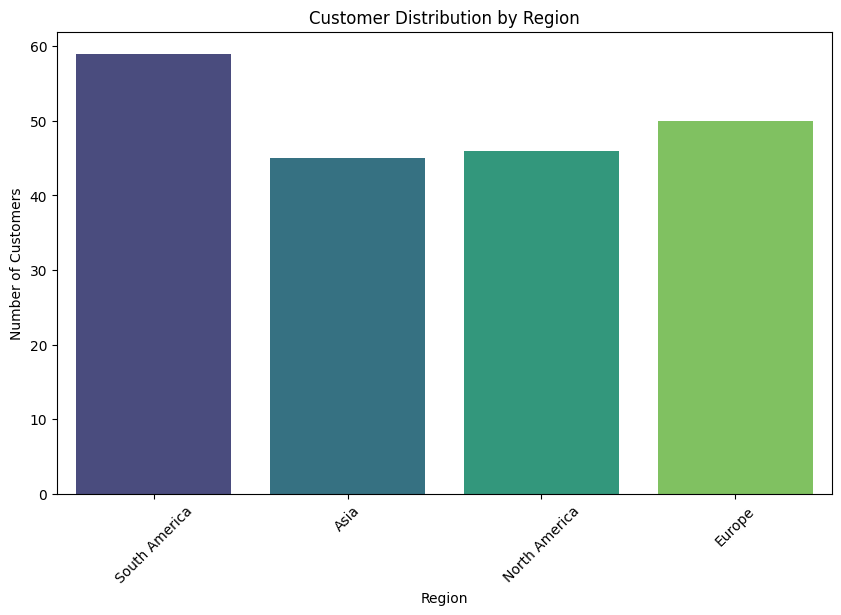

In [4]:

plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


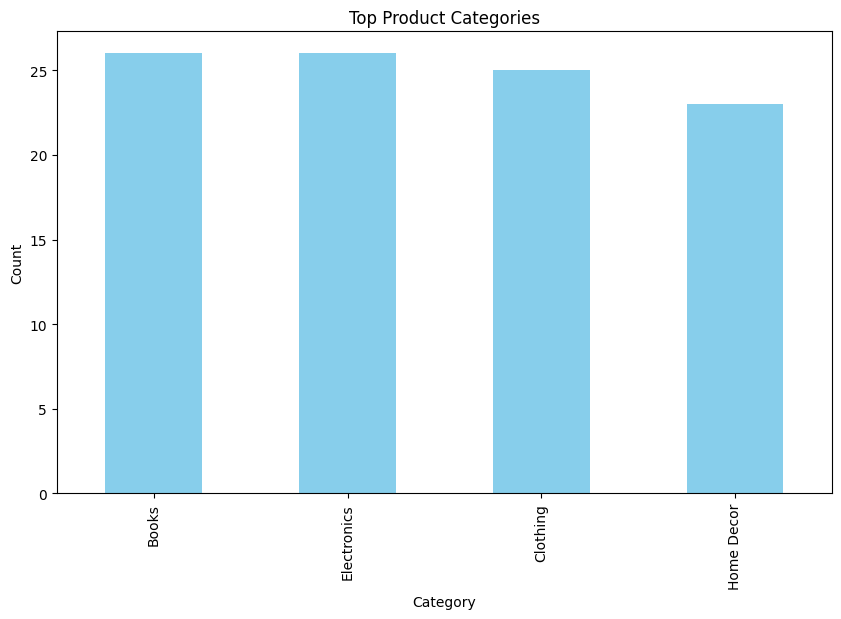

In [5]:

plt.figure(figsize=(10, 6))
products['Category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top Product Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


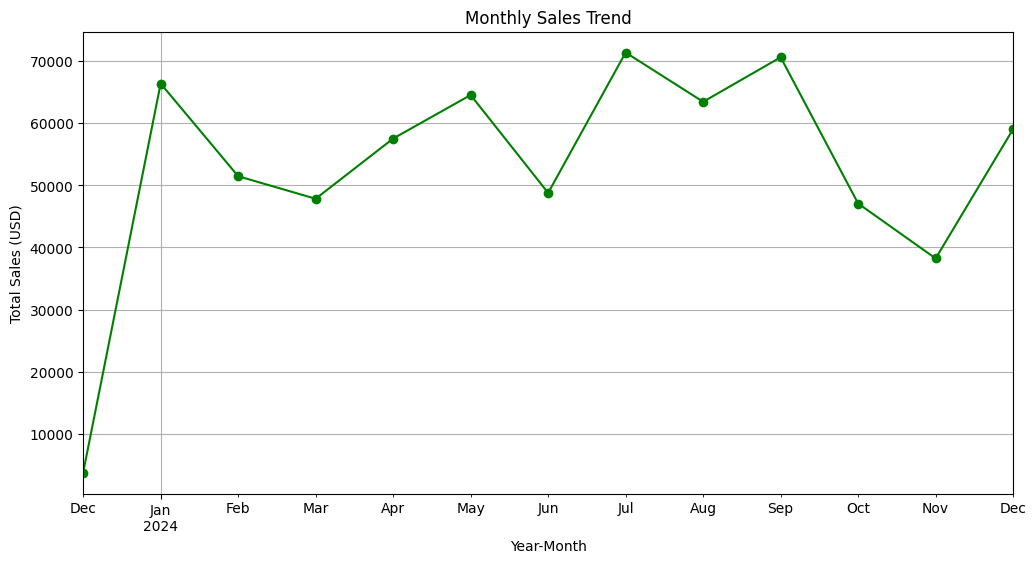

In [6]:

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')


monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()
